In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
dfNJ = df[df.state == 'New Jersey']
dfLTCNJ = pd.read_excel('LTC_Facilities_Outbreaks_List.xlsx', sheet_name='Table 1', skiprows=5)

In [4]:
dfNJ = df[df.state == 'New Jersey'].copy()
dfNJ.rename(columns={'county': 'County'}, inplace=True)

In [5]:
maxDate = dfNJ.date.max()
dfNJ = dfNJ[dfNJ.date == maxDate]

In [6]:
dfNJCounty = dfNJ.groupby(by=['County', 'fips']).sum()
dfNJCounty

,,cases,deaths
County,fips,,
Atlantic,34001.0,2049,149
Bergen,34003.0,17963,1528
Burlington,34005.0,4381,273
Camden,34007.0,6171,307
Cape May,34009.0,571,48
Cumberland,34011.0,2024,63
Essex,34013.0,17255,1605
Gloucester,34015.0,2103,138
Hudson,34017.0,18096,1143


In [7]:
dfLTCCounty = dfLTCNJ.groupby(by=['County']).sum()
dfLTCCounty.rename(columns={'Number of COVID\nConfirmed Residents': 'LTC Resident Cases', 
                            'Number of COVID\nConfirmed Staff': 'LTC Staff Cases',
                            'Number of COVID\nConfirmed Deaths among Residents': 'LTC Resident Deaths',
                            'Number of COVID Confirmed Deaths among Staff': 'LTC Staff Deaths'}, inplace=True)
dfLTCCounty

,LTC Resident Cases,LTC Staff Cases,LTC Resident Deaths,LTC Staff Deaths
County,,,,
Atlantic,579,229,116,1
Bergen,3033,1480,897,10
Burlington,1253,629,223,4
Camden,1092,358,232,3
Cape_May,187,135,38,0
Cumberland,268,172,31,1
Essex,2025,870,533,19
Gloucester,437,214,110,2
Hudson,713,409,187,7


In [8]:
dfNJ_w_LTC_df = dfLTCCounty.join(dfNJCounty)
dfNJ_w_LTC_df['LTC Deaths'] = dfNJ_w_LTC_df['LTC Resident Deaths'] + dfNJ_w_LTC_df['LTC Staff Deaths']
dfNJ_w_LTC_df['Deaths Non LTC'] = dfNJ_w_LTC_df['deaths'] - dfNJ_w_LTC_df['LTC Deaths']
dfNJ_w_LTC_df['LTC Cases'] = dfNJ_w_LTC_df['LTC Resident Cases'] + dfNJ_w_LTC_df['LTC Staff Cases']
dfNJ_w_LTC_df['Cases Non LTC'] = dfNJ_w_LTC_df['cases'] - dfNJ_w_LTC_df['LTC Cases']
dfNJ_w_LTC_df['% Deaths LTC'] = dfNJ_w_LTC_df['LTC Deaths'] / dfNJ_w_LTC_df['deaths']

In [9]:
dfNJ_w_LTC_df.sort_values(by=['deaths'], ascending=False, inplace=True)
dfNJ_w_LTC_df.head(2)

,,LTC Resident Cases,LTC Staff Cases,LTC Resident Deaths,LTC Staff Deaths,cases,deaths,LTC Deaths,Deaths Non LTC,LTC Cases,Cases Non LTC,% Deaths LTC
County,fips,,,,,,,,,,,
Essex,34013.0,2025,870,533,19,17255,1605,552,1053,2895,14360,0.343925
Bergen,34003.0,3033,1480,897,10,17963,1528,907,621,4513,13450,0.593586


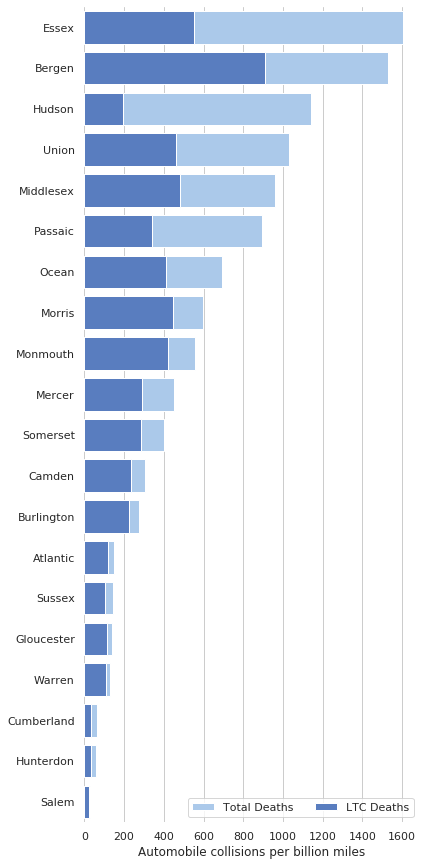

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="deaths", y="County", data=dfNJ_w_LTC_df.reset_index(),
            label="Total Deaths", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="LTC Deaths", y="County", data=dfNJ_w_LTC_df.reset_index(),
            label="LTC Deaths", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)